In [1]:
import torch

from sbi import inference
from sbi import simulators
from sbi import utils

from matplotlib import pyplot as plt

# use GPU if available
if torch.cuda.is_available():
    device = torch.device("cuda")
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
else:
    device = torch.device("cpu")
    torch.set_default_tensor_type("torch.FloatTensor")

## SNPE C

In [2]:
# get simulator and prior
simulator, prior, ground_truth_parameters, true_observation = simulators.get_simulator_prior_and_groundtruth("nonlinear-gaussian")

# create inference method
inference_method = inference.APT(
    simulator=simulator,
    prior=prior,
    true_observation=true_observation,
    density_estimator='maf',
    num_atoms=-1,
)

/home/janfb/qode/nflows/nflows/transforms/standard.py:62: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_shift", torch.tensor(shift if (shift is not None) else 0.0)
/home/janfb/qode/nflows/nflows/transforms/standard.py:65: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  "_scale", torch.tensor(scale if (scale is not None) else 1.0)
/home/janfb/anaconda3/envs/lfi/lib/python3.7/site-packages/torch/nn/functional.py:1340: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


In [7]:
# run inference
inference_method.run_inference(num_rounds=5, num_simulations_per_round=1000)

-------------------------49<03:16, 49.10s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 82
Best validation performance: -7.7596

-------------------------0:49<03:16, 49.10s/it]
||||| ROUND 1 STATS |||||:
-------------------------
Epochs trained: 82
Best validation performance: -7.7596

-------------------------2:02<02:49, 56.44s/it]
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 48
Best validation performance: -2.1380

-------------------------2:02<02:49, 56.44s/it]
||||| ROUND 2 STATS |||||:
-------------------------
Epochs trained: 48
Best validation performance: -2.1380

-------------------------5:00<03:05, 92.97s/it]
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 88
Best validation performance: -1.8227

-------------------------5:00<03:05, 92.97s/it]
||||| ROUND 3 STATS |||||:
-------------------------
Epochs trained: 88
Best validation performance: -1.8227

-------------------------7:16<01:45, 105.82s/it]
|||||

In [8]:
# sample posterior
samples = inference_method.sample_posterior(num_samples=10000)

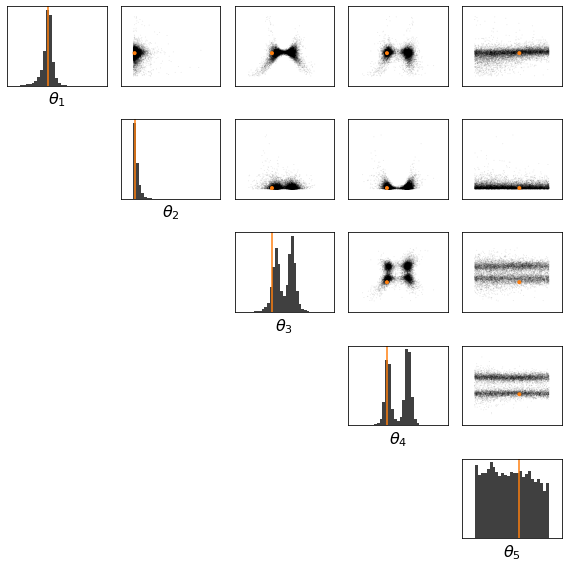

In [9]:
# plot samples
utils.plot_hist_marginals(
    utils.tensor2numpy(samples),
    lims=simulator.parameter_plotting_limits,
    ground_truth=utils.tensor2numpy(ground_truth_parameters).reshape(
        -1
    ),
)
plt.show()